In [22]:
import os
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import sparta.Statistics as stat

In [84]:
# Load data for all stars by looping through the directory
delCep_results = []
RRLyr_results = []
RCru_results = []
BGCru_results = []
for filename in os.listdir('./delCep'):
    delCep_results.append(stat.open_csv('./delCep/'+filename))
    print(filename)
for filename in os.listdir('./RRLyr'):
    RRLyr_results.append(stat.open_csv('./RRLyr/'+filename))
    print(filename)
for filename in os.listdir('./RCru'):
    RCru_results.append(stat.open_csv('./RCru/'+filename))
    print(filename)
for filename in os.listdir('./BGCru'):
    BGCru_results.append(stat.open_csv('./BGCru/'+filename))
    print(filename)

delCep_Hermes_spectra_4000_4200.csv
delCep_Hermes_spectra_4200_4400.csv
delCep_Hermes_spectra_4400_4600.csv
delCep_Hermes_spectra_4859_4862.csv
delCep_Hermes_spectra_5888_5892.csv
delCep_Hermes_spectra_5893_5897.csv
delCep_Hermes_spectra_6260_6300.csv
delCep_Hermes_spectra_6561_6564.csv
delCep_Hermes_spectra_6800_7000.csv
delCep_Hermes_spectra_7420_7520.csv
delCep_Hermes_spectra_7500_7700.csv
delCep_Hermes_spectra_7600_7630.csv
RRLyr_Hermes_spectra_4000_4200.csv
RRLyr_Hermes_spectra_4200_4400.csv
RRLyr_Hermes_spectra_4400_4600.csv
RRLyr_Hermes_spectra_4859_4862.csv
RRLyr_Hermes_spectra_5888_5892.csv
RRLyr_Hermes_spectra_5893_5897.csv
RRLyr_Hermes_spectra_6260_6300.csv
RRLyr_Hermes_spectra_6561_6564.csv
RRLyr_Hermes_spectra_6800_7000.csv
RRLyr_Hermes_spectra_7420_7520.csv
RRLyr_Hermes_spectra_7500_7700.csv
RRLyr_Hermes_spectra_7600_7630.csv
RCru_4000_4200.csv
RCru_4200_4400.csv
RCru_4400_4600.csv
RCru_4859_4862.csv
RCru_5888_5892.csv
RCru_5893_5897.csv
RCru_6260_6300.csv
RCru_6561_6564.

## $\delta$ Cephei

In [79]:
period_truth = 5.366267

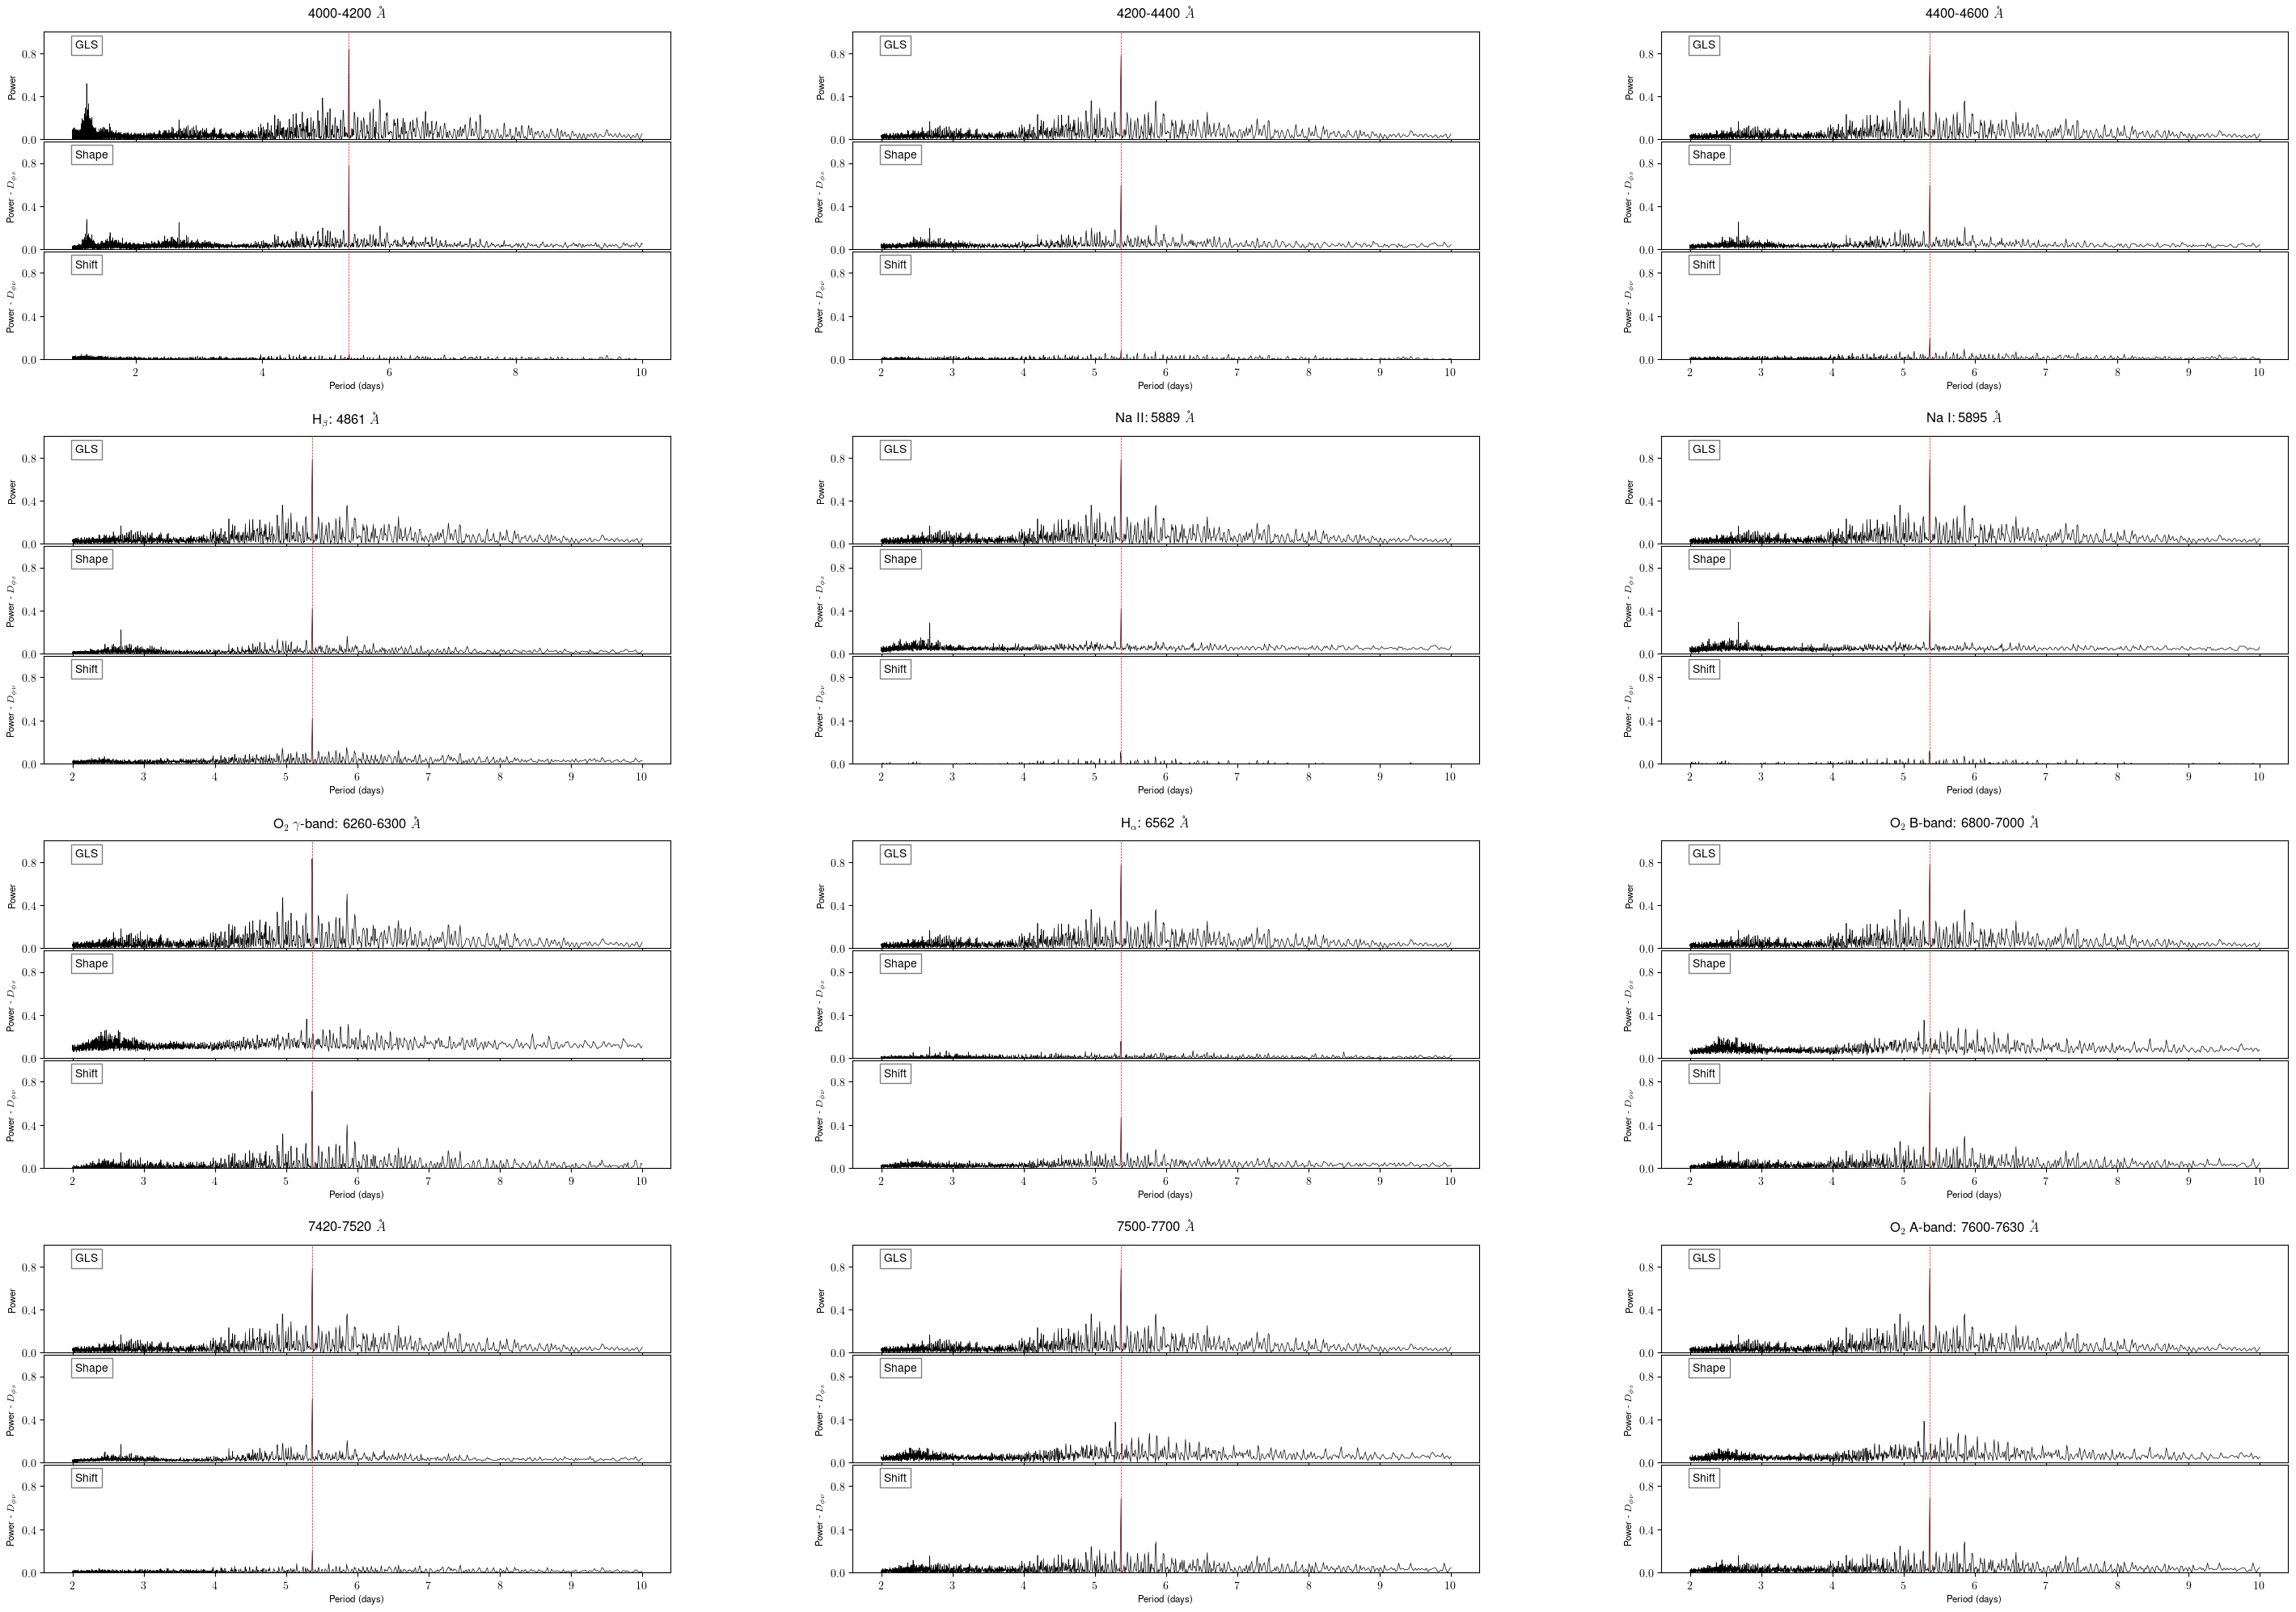

In [81]:
# Create a figure with 11 subfigures arranged in a 4*3 grid
plt.style.use('sparta')

fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'$\delta$ Cephei - Tellurics Analysis', fontsize='x-large')

# plt.suptitle(r'$\delta$ Cephei - Tellurics Analysis', fontsize='x-large')

subfigs = fig.subfigures(4, 3)

for outerind, subfig in enumerate(subfigs.flat):
    axs = subfig.subplots(3, 1,sharex=True)
    if outerind<=11:
        if outerind==0:
            subfig.suptitle(r'4000-4200 $\AA$')
        elif outerind==1:
            subfig.suptitle(r'4200-4400 $\AA$')
        elif outerind==2:
            subfig.suptitle(r'4400-4600 $\AA$')
        elif outerind==3:
            subfig.suptitle(r'H$_{\beta}$: 4861 $\AA$')
        elif outerind==4:
            subfig.suptitle(r'Na II: 5889 $\AA$')
        elif outerind==5:
            subfig.suptitle(r'Na I: 5895 $\AA$')
        elif outerind==6:
            subfig.suptitle(r'O$_{2}$ $\gamma$-band: 6260-6300 $\AA$')
        elif outerind==7:
            subfig.suptitle(r'H$_{\alpha}$: 6562 $\AA$')
        elif outerind==8:
            subfig.suptitle(r'O$_{2}$ B-band: 6800-7000 $\AA$')
        elif outerind==9:
            subfig.suptitle(r'7420-7520 $\AA$')
        elif outerind==10:
            subfig.suptitle(r'7500-7700 $\AA$')
        elif outerind==11:
            subfig.suptitle(r'O$_{2}$ A-band: 7600-7630 $\AA$')
        for innerind, ax in enumerate(axs.flat):
            if innerind==0:
                ax.plot(delCep_results[outerind]['period'], delCep_results[outerind]['gls'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel('Power', fontsize='small')
            elif innerind==1:
                ax.plot(delCep_results[outerind]['period'], delCep_results[outerind]['shape'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
            elif innerind==2:
                ax.plot(delCep_results[outerind]['period'],delCep_results[outerind]['shift'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
                ax.set_xlabel('Period (days)', fontsize='small')
            # Add a small text box
            text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
            ax.text(0.05, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_ylim(0,1)
            ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    #and recenter the last two that are not used
    else:
        for innerind, ax in enumerate(axs.flat):
            ax.axis('off')
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
plt.savefig('delCep_tellurics.png', dpi=300)
plt.show()

## RRLyr

In [82]:
period_truth = 0.566777

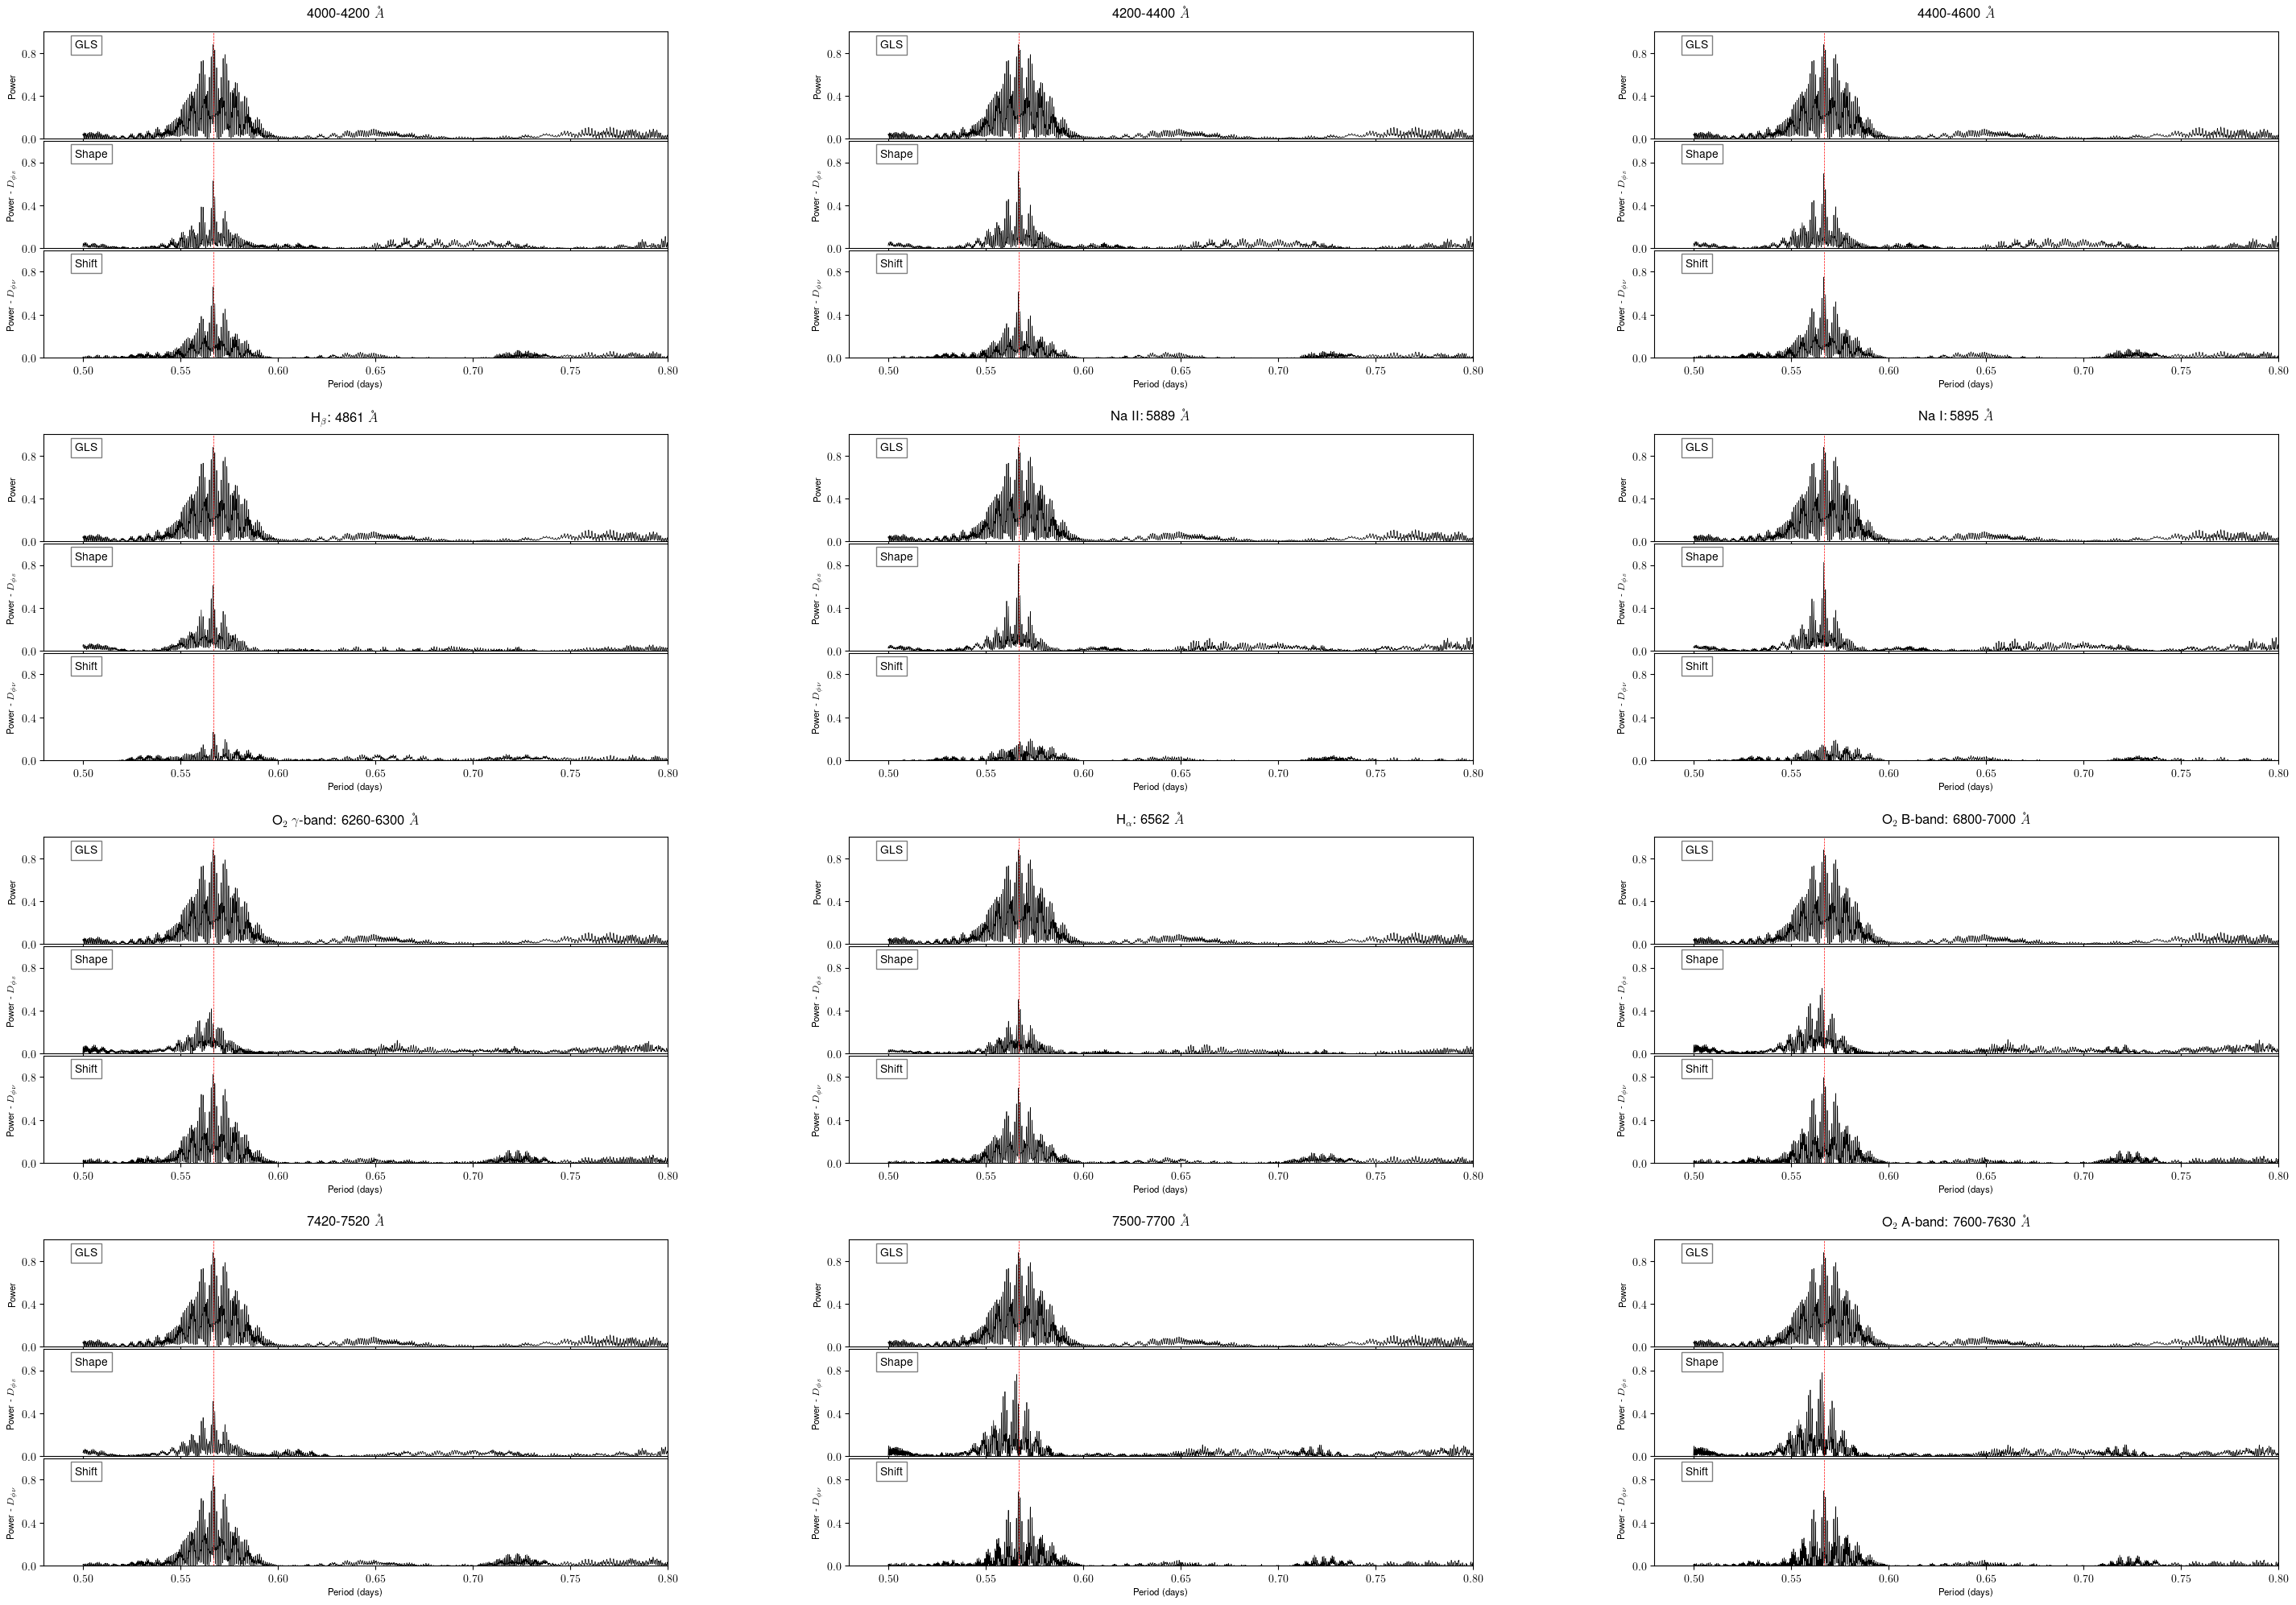

In [83]:
fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'RR Lyrae - Tellurics Analysis', fontsize='x-large')

# plt.suptitle(r'$\delta$ Cephei - Tellurics Analysis', fontsize='x-large')

subfigs = fig.subfigures(4, 3)

for outerind, subfig in enumerate(subfigs.flat):
    axs = subfig.subplots(3, 1,sharex=True)
    if outerind<=11:
        if outerind==0:
            subfig.suptitle(r'4000-4200 $\AA$')
        elif outerind==1:
            subfig.suptitle(r'4200-4400 $\AA$')
        elif outerind==2:
            subfig.suptitle(r'4400-4600 $\AA$')
        elif outerind==3:
            subfig.suptitle(r'H$_{\beta}$: 4861 $\AA$')
        elif outerind==4:
            subfig.suptitle(r'Na II: 5889 $\AA$')
        elif outerind==5:
            subfig.suptitle(r'Na I: 5895 $\AA$')
        elif outerind==6:
            subfig.suptitle(r'O$_{2}$ $\gamma$-band: 6260-6300 $\AA$')
        elif outerind==7:
            subfig.suptitle(r'H$_{\alpha}$: 6562 $\AA$')
        elif outerind==8:
            subfig.suptitle(r'O$_{2}$ B-band: 6800-7000 $\AA$')
        elif outerind==9:
            subfig.suptitle(r'7420-7520 $\AA$')
        elif outerind==10:
            subfig.suptitle(r'7500-7700 $\AA$')
        elif outerind==11:
            subfig.suptitle(r'O$_{2}$ A-band: 7600-7630 $\AA$')
        for innerind, ax in enumerate(axs.flat):
            if innerind==0:
                ax.plot(RRLyr_results[outerind]['period'], RRLyr_results[outerind]['gls'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel('Power', fontsize='small')
            elif innerind==1:
                ax.plot(RRLyr_results[outerind]['period'], RRLyr_results[outerind]['shape'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
            elif innerind==2:
                ax.plot(RRLyr_results[outerind]['period'],RRLyr_results[outerind]['shift'] ,linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
                ax.set_xlabel('Period (days)', fontsize='small')
            # Add a small text box
            text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
            ax.text(0.05, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_ylim(0,1)
            ax.set_xlim(0.48,0.8)
            ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    #and recenter the last two that are not used
    else:
        for innerind, ax in enumerate(axs.flat):
            ax.axis('off')
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
plt.savefig('RRLyr_tellurics.png', dpi=300)
plt.show()

## R Crucis

In [72]:
period_truth = 5.825680

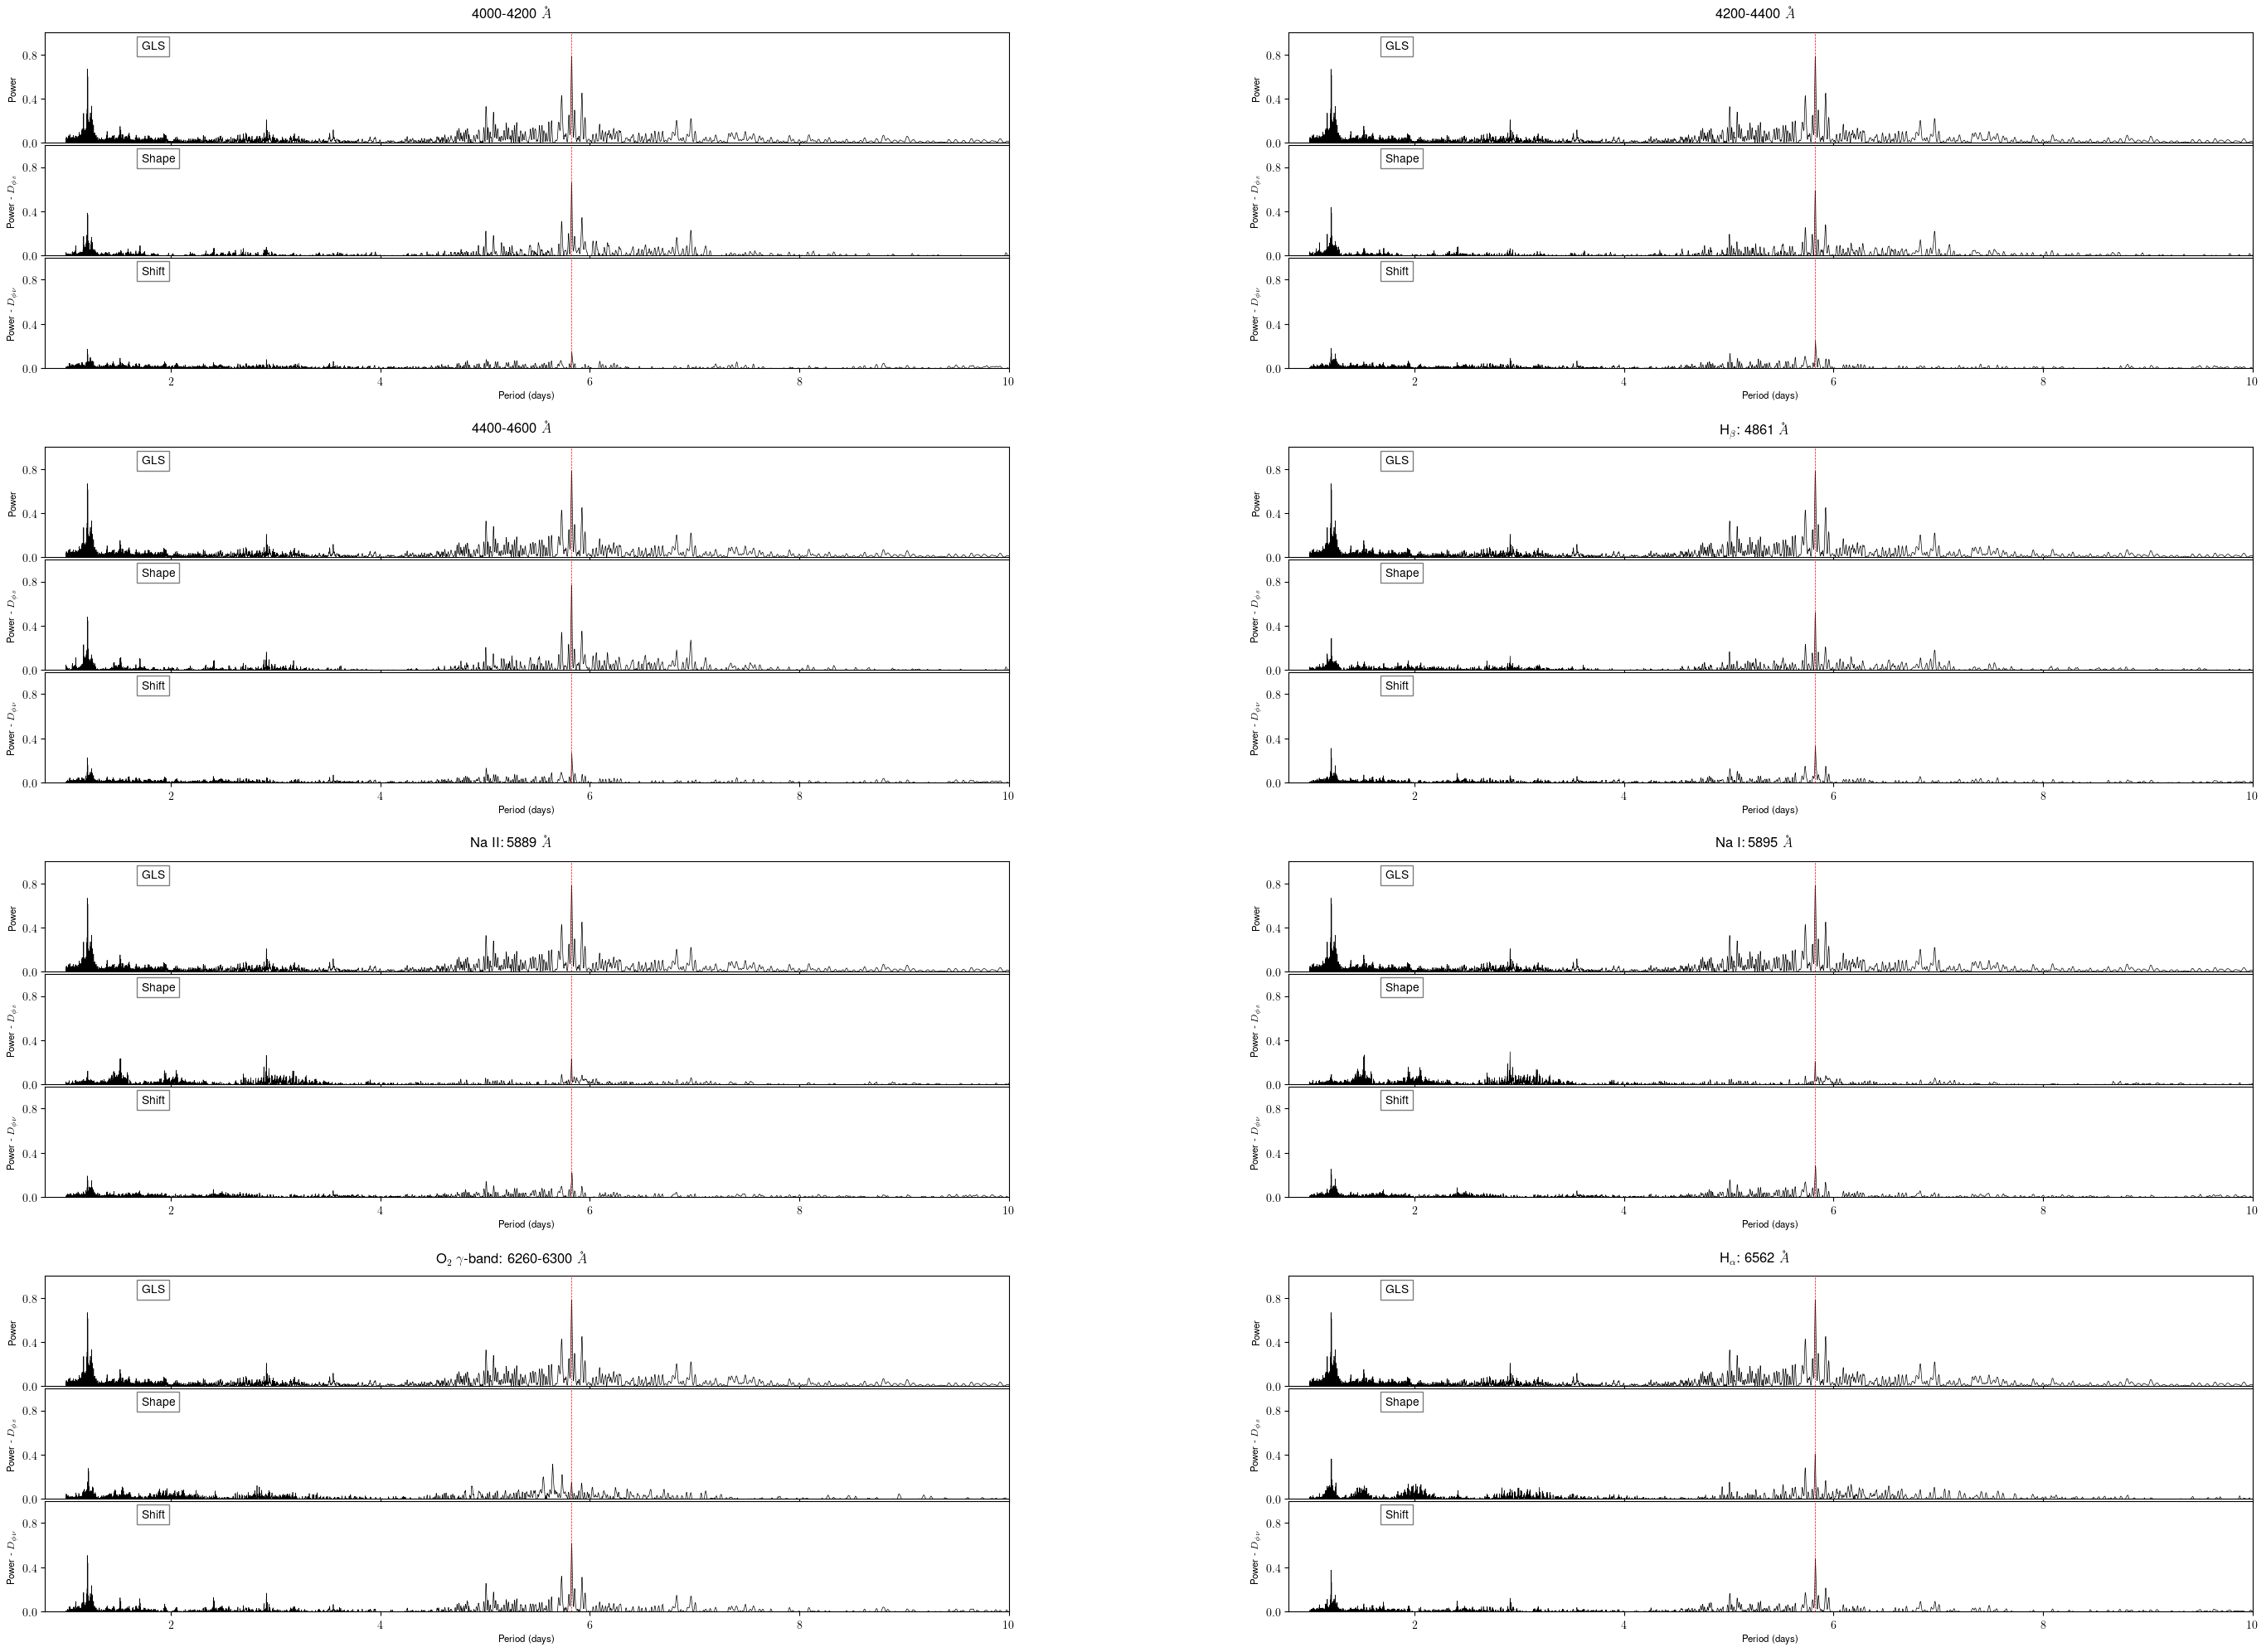

In [77]:
fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'R Crucis - Tellurics Analysis', fontsize='x-large')

# plt.suptitle(r'$\delta$ Cephei - Tellurics Analysis', fontsize='x-large')

subfigs = fig.subfigures(4, 2)

for outerind, subfig in enumerate(subfigs.flat):
    axs = subfig.subplots(3, 1,sharex=True)
    if outerind<11:
        if outerind==0:
            subfig.suptitle(r'4000-4200 $\AA$')
        elif outerind==1:
            subfig.suptitle(r'4200-4400 $\AA$')
        elif outerind==2:
            subfig.suptitle(r'4400-4600 $\AA$')
        elif outerind==3:
            subfig.suptitle(r'H$_{\beta}$: 4861 $\AA$')
        elif outerind==4:
            subfig.suptitle(r'Na II: 5889 $\AA$')
        elif outerind==5:
            subfig.suptitle(r'Na I: 5895 $\AA$')
        elif outerind==7:
            subfig.suptitle(r'H$_{\alpha}$: 6562 $\AA$')
        elif outerind==6:
            subfig.suptitle(r'O$_{2}$ $\gamma$-band: 6260-6300 $\AA$')
        for innerind, ax in enumerate(axs.flat):
            if innerind==0:
                ax.plot(RCru_results[outerind]['period'], RCru_results[outerind]['gls'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel('Power', fontsize='small')
            elif innerind==1:
                ax.plot(RCru_results[outerind]['period'], RCru_results[outerind]['shape'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
            elif innerind==2:
                ax.plot(RCru_results[outerind]['period'],RCru_results[outerind]['shift'] ,linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
                ax.set_xlabel('Period (days)', fontsize='small')
            # Add a small text box
            text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
            ax.text(0.1, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_ylim(0,1)
            ax.set_xlim(0.8,10)
            ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    #and recenter the last two that are not used
    else:
        for innerind, ax in enumerate(axs.flat):
            ax.axis('off')
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
plt.savefig('RCru_tellurics.png', dpi=300)
plt.show()

## BG Crucis

In [86]:
period_truth = 3.342540

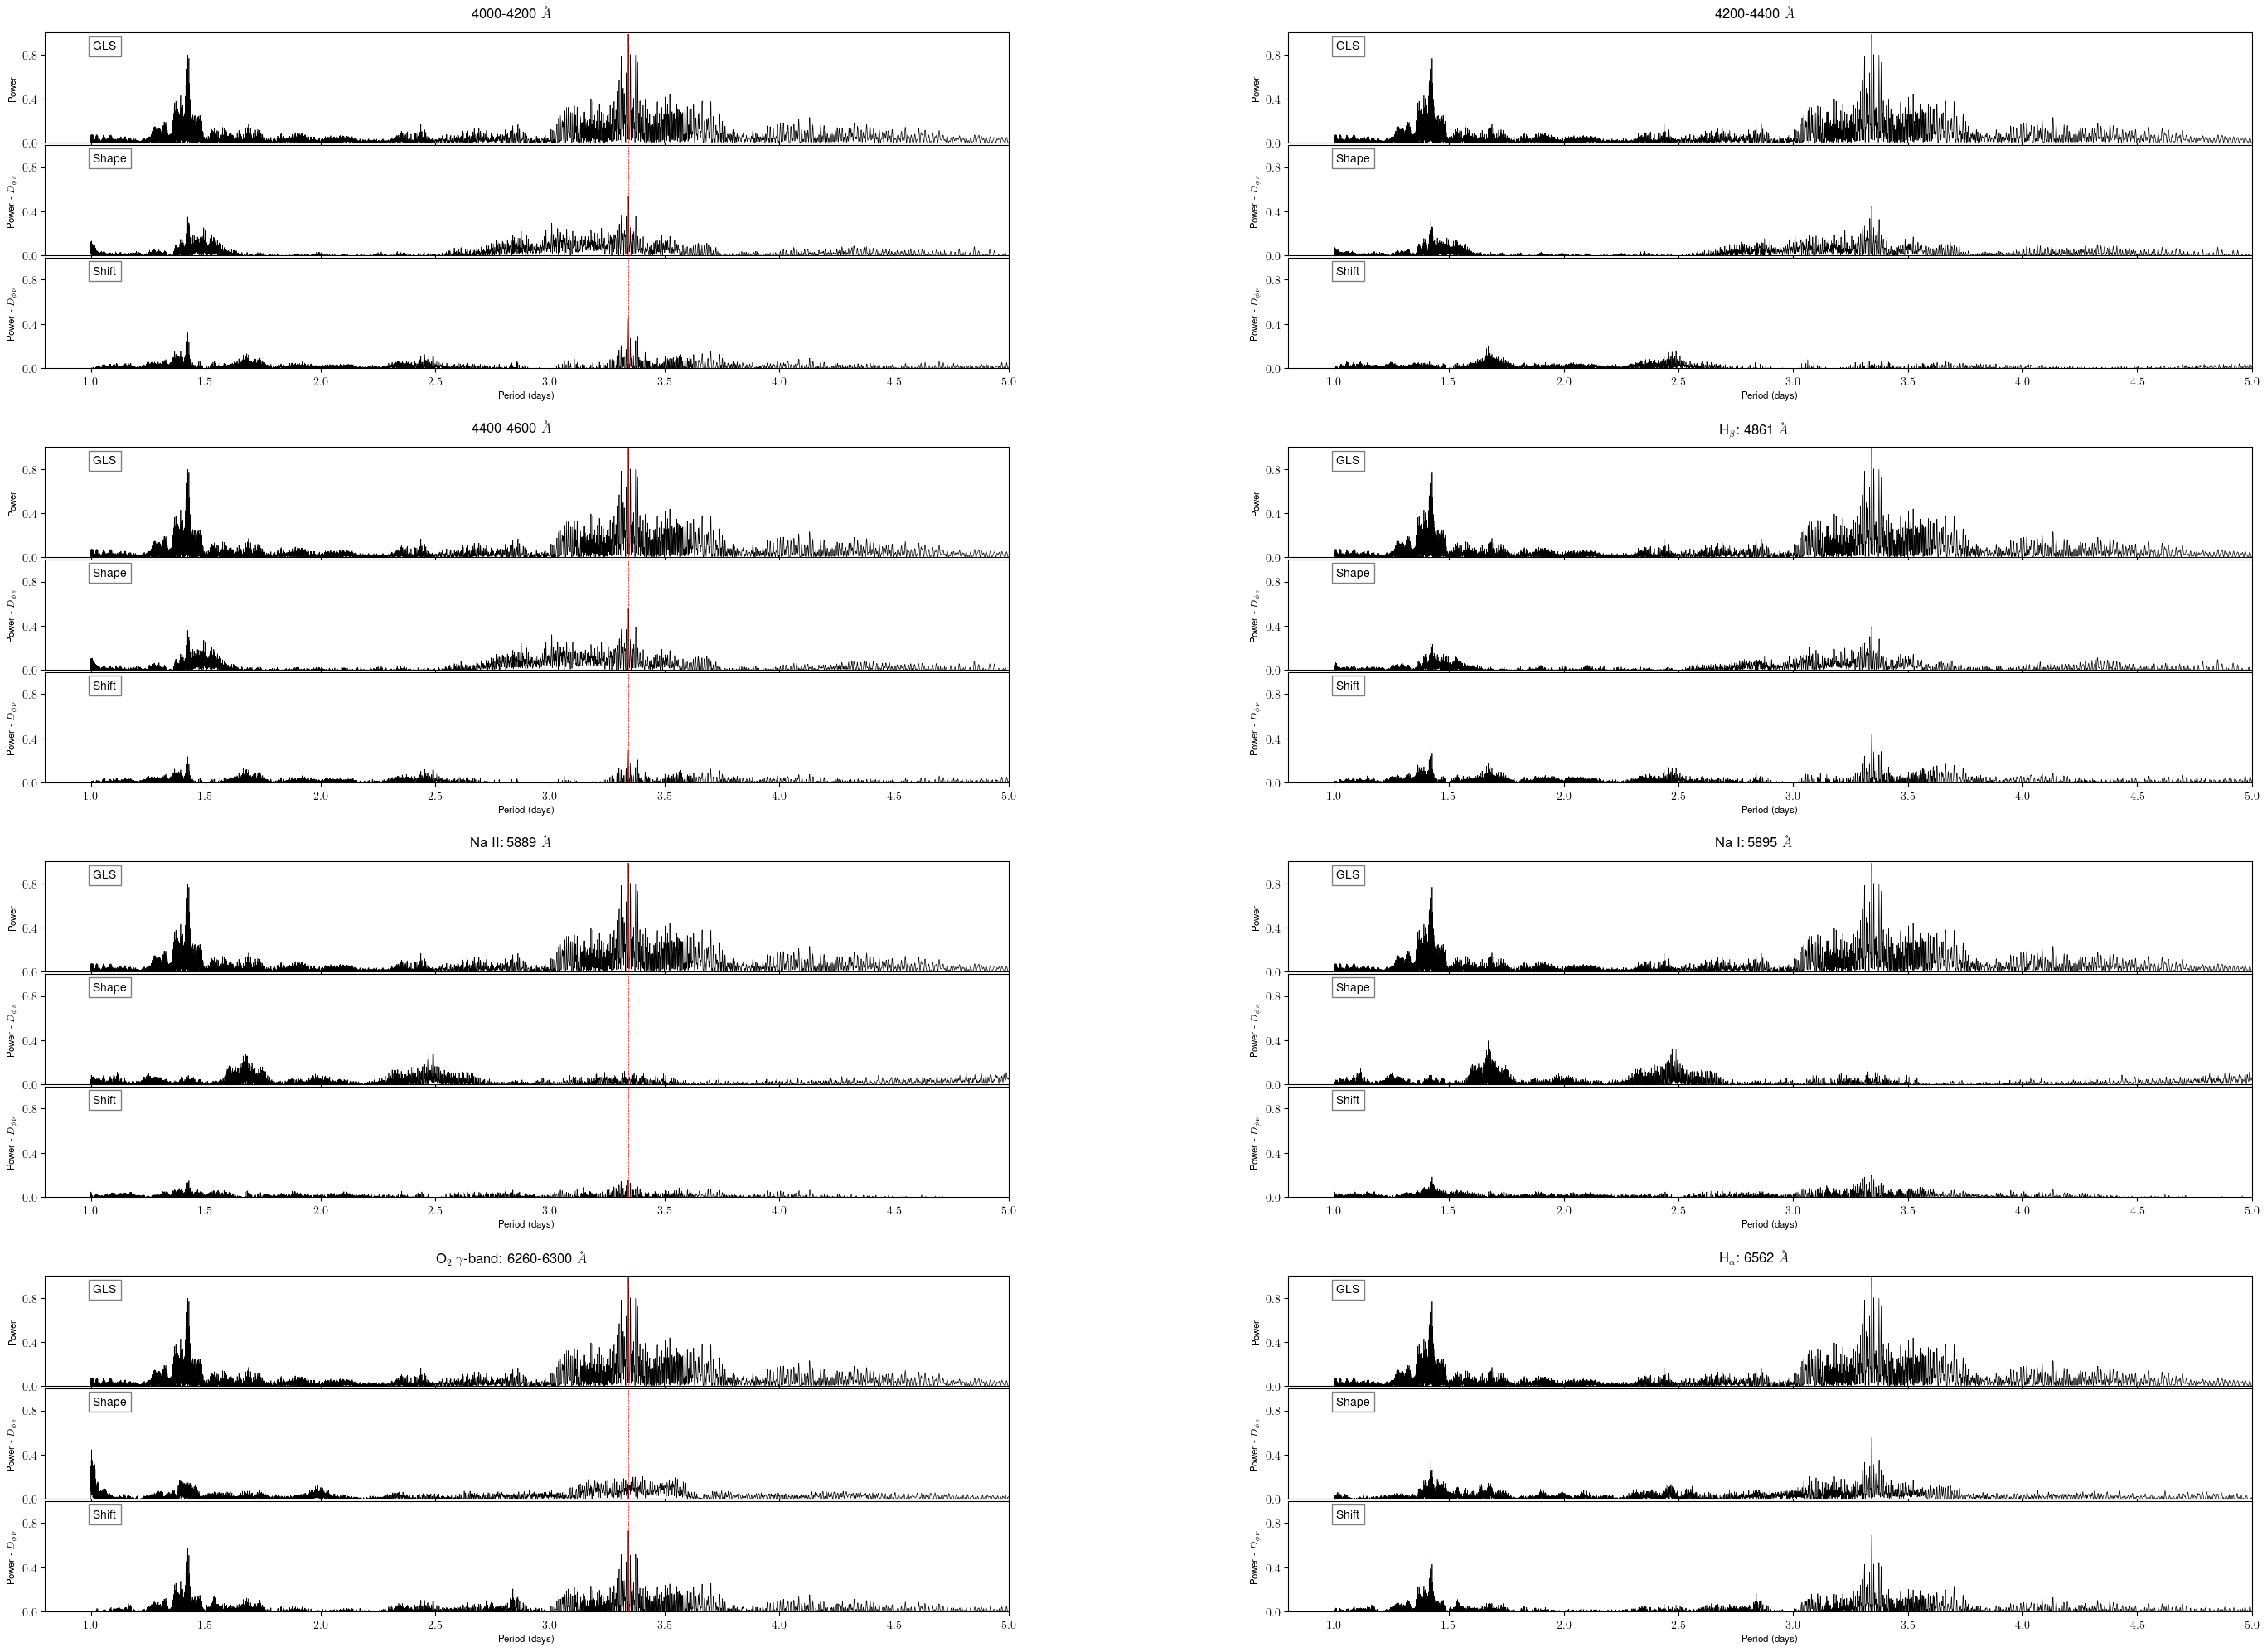

In [89]:
fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'BG Crucis - Tellurics Analysis', fontsize='x-large')

# plt.suptitle(r'$\delta$ Cephei - Tellurics Analysis', fontsize='x-large')

subfigs = fig.subfigures(4, 2)

for outerind, subfig in enumerate(subfigs.flat):
    axs = subfig.subplots(3, 1,sharex=True)
    if outerind<11:
        if outerind==0:
            subfig.suptitle(r'4000-4200 $\AA$')
        elif outerind==1:
            subfig.suptitle(r'4200-4400 $\AA$')
        elif outerind==2:
            subfig.suptitle(r'4400-4600 $\AA$')
        elif outerind==3:
            subfig.suptitle(r'H$_{\beta}$: 4861 $\AA$')
        elif outerind==4:
            subfig.suptitle(r'Na II: 5889 $\AA$')
        elif outerind==5:
            subfig.suptitle(r'Na I: 5895 $\AA$')
        elif outerind==7:
            subfig.suptitle(r'H$_{\alpha}$: 6562 $\AA$')
        elif outerind==6:
            subfig.suptitle(r'O$_{2}$ $\gamma$-band: 6260-6300 $\AA$')
        for innerind, ax in enumerate(axs.flat):
            if innerind==0:
                ax.plot(BGCru_results[outerind]['period'], BGCru_results[outerind]['gls'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel('Power', fontsize='small')
            elif innerind==1:
                ax.plot(BGCru_results[outerind]['period'], BGCru_results[outerind]['shape'],linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
            elif innerind==2:
                ax.plot(BGCru_results[outerind]['period'],BGCru_results[outerind]['shift'] ,linewidth=0.5)
                ax.axvline(period_truth, color='r', linestyle='--',linewidth=0.5)
                ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
                ax.set_xlabel('Period (days)', fontsize='small')
            # Add a small text box
            text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
            ax.text(0.05, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_ylim(0,1)
            ax.set_xlim(0.8,5)
            ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    #and recenter the last two that are not used
    else:
        for innerind, ax in enumerate(axs.flat):
            ax.axis('off')
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
plt.savefig('BGCru_tellurics.png', dpi=300)
plt.show()